In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Loading the dataset:
data = pd.read_csv('/Users/damonharrington/Downloads/Loan Prediction.csv')

#Data Preprocessing:
#Handle any missing values:
data.fillna(data.median(), inplace=True)

#Converting categorical columns to numerical using Label Encoding:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

#Normalizing the data:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

#Define features and target:
X = scaled_data[:, :-1] #Features 
y = scaled_data[:, -1]  #Target

#Reshape X for RNN(samples, time steps, features):
X = X.reshape((X.shape[0], 1, X.shape[1]))

#Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Build the RNN model:
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1, activation='sigmoid') #Sigmoid for binary classification.
])

#Compiling the model:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

#Training the model:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

#Evaluating the model:
y_pred = (model.predict(X_test) > 0.5).astype(int)


/var/folders/h4/1vdk_4sx54g330jcjjjdrq8c0000gn/T/ipykernel_28642/206940691.py:15: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


Epoch 1/20
5040/5040 [==============================] - 4s 731us/step - loss: 0.3742 - accuracy: 0.8769 - val_loss: 0.3706 - val_accuracy: 0.8771
Epoch 2/20
5040/5040 [==============================] - 4s 699us/step - loss: 0.3693 - accuracy: 0.8773 - val_loss: 0.3659 - val_accuracy: 0.8771
Epoch 3/20
5040/5040 [==============================] - 4s 708us/step - loss: 0.3669 - accuracy: 0.8773 - val_loss: 0.3658 - val_accuracy: 0.8771
Epoch 4/20
5040/5040 [==============================] - 4s 704us/step - loss: 0.3650 - accuracy: 0.8773 - val_loss: 0.3644 - val_accuracy: 0.8771
Epoch 5/20
5040/5040 [==============================] - 4s 704us/step - loss: 0.3638 - accuracy: 0.8773 - val_loss: 0.3612 - val_accuracy: 0.8771
Epoch 6/20
5040/5040 [==============================] - 4s 699us/step - loss: 0.3629 - accuracy: 0.8773 - val_loss: 0.3607 - val_accuracy: 0.8771
Epoch 7/20
5040/5040 [==============================] - 4s 717us/step - loss: 0.3619 - accuracy: 0.8773 - val_loss: 0.3593 -

In [6]:
#Results:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[44139     8]
 [ 6227    26]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      1.00      0.93     44147
         1.0       0.76      0.00      0.01      6253

    accuracy                           0.88     50400
   macro avg       0.82      0.50      0.47     50400
weighted avg       0.86      0.88      0.82     50400

Accuracy Score: 0.8762896825396825


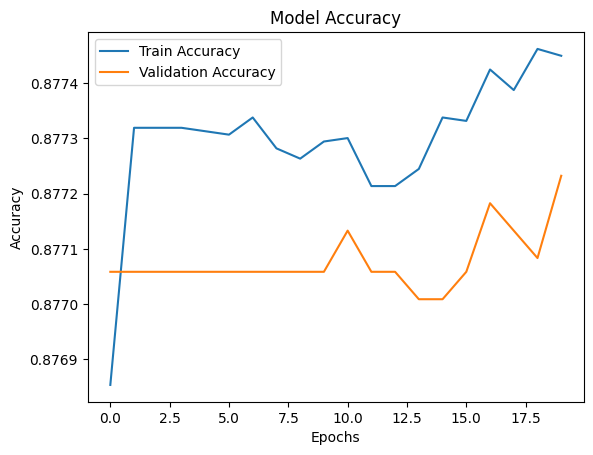

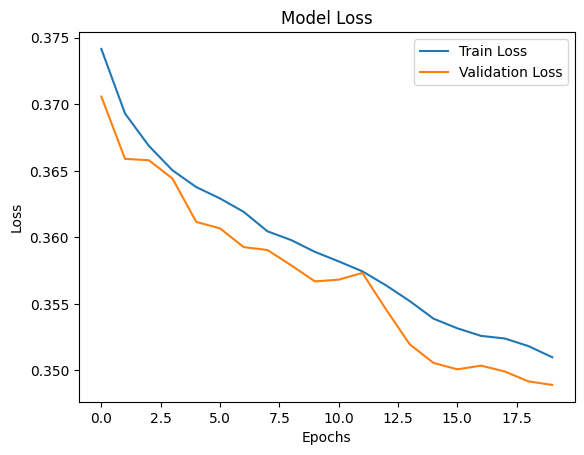

In [7]:
#Plotting training history for analysis:
import matplotlib.pyplot as plt

#Plot for accuracy:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Plot for loss:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

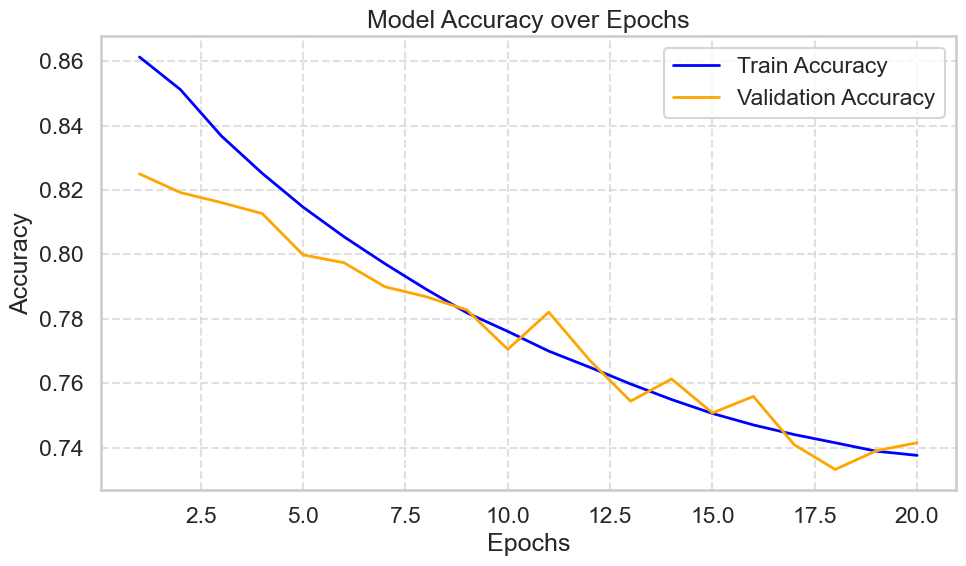

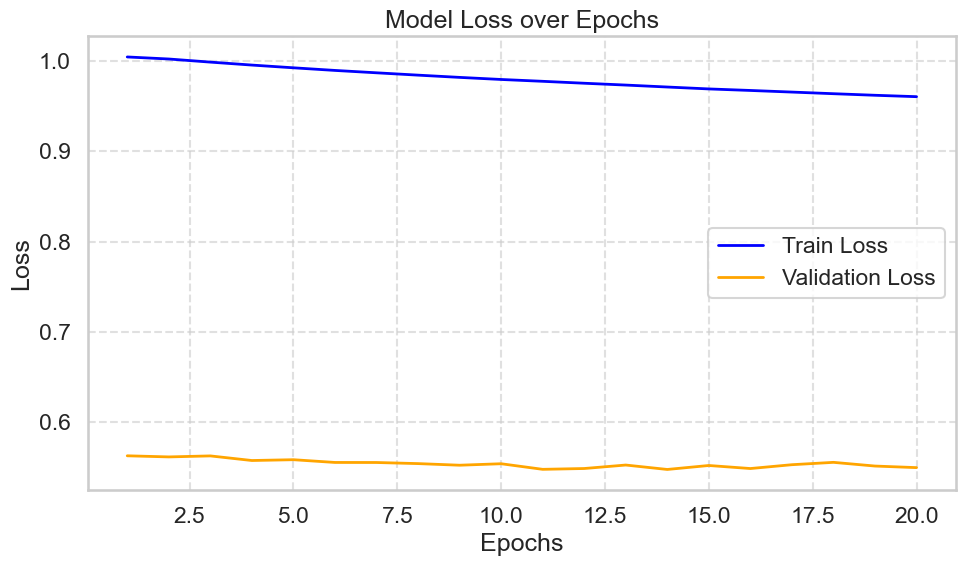

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Seaborn styling:
sns.set(style='whitegrid', context='talk', palette='muted')

#Function to smooth the curve for better visualization:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            smoothed_points.append(smoothed_points[-1] * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

#Plotting training history for analysis with enhancements:
epochs = range(1, len(history.history['accuracy']) + 1)

#Ploting accuracy with smoothing:
plt.figure(figsize=(10, 6))
plt.plot(epochs, smooth_curve(history.history['accuracy']), label='Train Accuracy', color='blue', linewidth=2)
plt.plot(epochs, smooth_curve(history.history['val_accuracy']), label='Validation Accuracy', color='orange', linewidth=2)
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#Ploting loss with smoothing:
plt.figure(figsize=(10, 6))
plt.plot(epochs, smooth_curve(history.history['loss']), label='Train Loss', color='blue', linewidth=2)
plt.plot(epochs, smooth_curve(history.history['val_loss']), label='Validation Loss', color='orange', linewidth=2)
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()